<a href="https://colab.research.google.com/github/Marcecr/Entrega_11/blob/main/Honey_Production_11%2B_Casta%C3%B1eda_Riascos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[texto del enlace](https://)(https://bee.png)



Ivonne Marcela Castañeda Riascos

# ANALISIS DE DATOS EXPLORATORIO DE LA PRODUCCION DE MIEL ENTRE 1998-2016 EN EEUU

Resumen **texto en negrita**
Las abejas son insectos de gran importantes en el planeta, dedibo a que ellas son responsbles de polinizar diferentes plantas importantes para la alimentacion del ser humano. Ellas se alimentan del polen y de nectar de las plantas , estos dos productos gozan de diferentes propiedad como lo son antioxidantes , antiflamatorio y antibioticos, por esta razon la miel ha sido cosechada, almacenada y comercializada desde los incionos de la humanidad  hace mas de 6000 años.
Esta base datos(Dataset), corresponde a la producion, demanda y oferta de miel de la abeja *Apis mellifera*, de distintos estados de EEUU.
La informacion fue recolectada por la empresa Statistal(https://www.statista.com/statistics/593656/us-honey-production-volume/ ) y se encuentra en un archivo CSV(US_honey_dataset_updated) con 785 y 8 columnas.

Objetivo
Visualizar cómo ha cambiado la producción de miel a lo largo de los años (1998-2016) en Estados Unidos.

Hipotesis:
H0: No es Alabama el estado que mas produjo miel.
HA: Es Alabama el estado que mas produjo miel.
De acuerdo con el analisis DCA es Norte de Dakota

H0:No fue el año 2008 fue el año de mas produccion de miel de todos los estados evaluados.
HA:El año 2008 fue el año de mas produccion de miel de todos los estados evaluados.

Fue  1998

Preguntas :

1.¿Cómo ha cambiado el rendimiento de la producción de miel de 1998 a 2016?
A lo largo del tiempo,
2.¿cuáles han sido las principales tendencias de producción en los distintos estados?
3.¿Existen patrones que puedan observarse entre la producción total de miel y el valor de la producción cada año?
4.¿Cómo ha cambiado cada año el valor de la producción, estara vinculado a la demanda?

Cada registro contiene 9 caracteristicas. Las columnas son:
 0   Unname
 1   estado  = state  (categorica)             
 2   numero_colonias   = numcol (numerica)      
 3   Producion_por_colonia = yieldpercol(numerica)
 4   production    = totalprod (numerica)         
 5   existencia   = stocks (numerica)         
 6   promedio_precio = priceperlb	(numerica)   
 7   value_of_production  = prodvalue (numerica)
 8   año = year (numerica)


In [ ]:
## Cargamos las librerias pandas,numpy,matplotlib, seaborn para realizar visualizacion de los datos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits import mplot3d
import datetime as dt
import plotly.offline as py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/honeyproduction1998-2016.csv')

# **Analisis Exploratorio de Datos(EDA)**
En este apartado exploraremos los datos, el nombre de las variables el tamaño de la base de datos,los tipos de variables y el tamaño de las variables.

In [ ]:
df.head() # Con esta funcion vemos los primeros 5 registros del dataset

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [ ]:
df.tail() # Con esta funcion vemos los primeros 5 ultimos registros del dataset

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
780,Virginia,5000.0,38,190000.0,30000.0,5.85,1112000.0,2016
781,Washington,84000.0,35,2940000.0,412000.0,1.99,5851000.0,2016
782,West Virginia,5000.0,32,160000.0,43000.0,3.92,627000.0,2016
783,Wisconsin,54000.0,62,3348000.0,1205000.0,2.67,8939000.0,2016
784,Wyoming,40000.0,68,2720000.0,190000.0,1.78,4842000.0,2016


In [ ]:
df.shape## Exploremos eltamaño del dataset .Se observan 785 observaciones y 8 columnas.

(785, 8)

[**La base de datos Honey production tiene 8 variables y 785 registros.**]

In [ ]:
df['state'].nunique()

44

Se analizo la miel en 44 estados de estados Unidos

In [ ]:
df['state'].unique()## Numero de estados

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

In [ ]:
df['year'].nunique()## Numero de años evaluados

19

In [ ]:
df['year'].min() ## Numero minimo de años

1998

In [ ]:
df['year'].max() ## Numero maximo de años

2016

****Cual fue estado con mayor producion  y en que año?
North Dakota en el 2010

In [ ]:
df[df['totalprod'] == df ['totalprod'].max()][["state","year"]]

,state,year
532,North Dakota,2010


Cual es el redimiento promedio por colonia cada año?
Podemos observar que durante los ultimos años disminuye el rendiemiento promedio de cada colonia.

In [ ]:
df[['year' ,'yieldpercol']].groupby('year').mean().round()

,yieldpercol
year,
1998,70.0
1999,65.0
2000,68.0
2001,65.0
2002,67.0
2003,63.0
2004,65.0
2005,64.0
2006,62.0


In [ ]:
# Gráfico de dispersión interactivo con el paquete plotly
import plotly.express as px
px.scatter(df, x = 'numcol', y = 'prodvalue', animation_frame = 'year', size = 'totalprod')

En este grafico interactivo vemos la produccion en relacion al numero de colonias como varia con el tiempo.

# Analisis de variables, univariado y multivariado.

A continuacion realizaremos un analisis de las metricas(media, desviacion standar), exploraremoa posibles correlaciones de las variables que conforman la base de datos.

In [ ]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,785.000000,785.000000,7.850000e+02,7.850000e+02,785.000000,7.850000e+02,785.000000
mean,61686.624204,60.578344,4.140957e+06,1.257629e+06,1.695159,5.489739e+06,2006.817834
std,92748.940458,19.427831,6.884594e+06,2.211794e+06,0.930623,9.425394e+06,5.491523
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,46.000000,4.700000e+05,1.190000e+05,1.050000,9.010000e+05,2002.000000
50%,26000.000000,58.000000,1.500000e+06,3.910000e+05,1.480000,2.112000e+06,2007.000000
75%,65000.000000,72.000000,4.096000e+06,1.380000e+06,2.040000,5.559000e+06,2012.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,7.090000,8.385900e+07,2016.000000


EXPLORACION   VALORES NULOS
**Revisamos si en el dataframe,tenemos valores nulos con lo metodo isnull.*

In [ ]:
df.isnull()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
780,False,False,False,False,False,False,False,False
781,False,False,False,False,False,False,False,False
782,False,False,False,False,False,False,False,False
783,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

Conclucion:En este dataframe, no tenemos valores nulos.

In [ ]:
df.dtypes## Exploramos el tipo de varaiables  para asegurarnos que los datos se lean bien.

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

La variable year es de tipo entero,vamos a convertirla en una variable categorica.
Las demas variables son float e int.

In [ ]:
df.year = df.year.astype('category')

Analizaremos las variables cuantitativas del conjunto de datos.

In [ ]:
df['numcol'].describe()

count       785.000000
mean      61686.624204
std       92748.940458
min        2000.000000
25%        9000.000000
50%       26000.000000
75%       65000.000000
max      510000.000000
Name: numcol, dtype: float64

Los valores son 2000, 61686 y 510000 para el mínimo, la media y el máximo, respectivamente. La diferencia entre el mínimo y el máximo, y entre la media y el valor máximo sugieren que pueden haber outliers en el dataset.

Text(0.5, 0, 'Total Colmens')

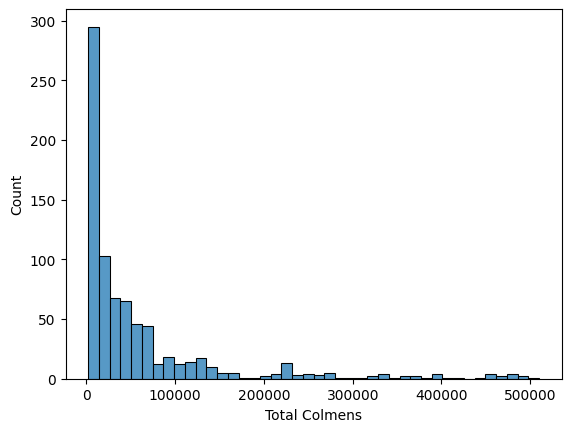

In [ ]:
# Crear Histograma usanda seaborn.
g = sns.histplot(data = df, x = 'numcol')
# Nombres de los ejes
g.set_xlabel('Total Colmens')

En el histograma podemos ver que el numero de colmenas se concentran por debajo de las 100000 aproximadamente, mientras que el resto de barras tienen alturas muy bajas y se sitúan muy alejadas del resto de datos.

Text(0.5, 0, 'Total colmenas')

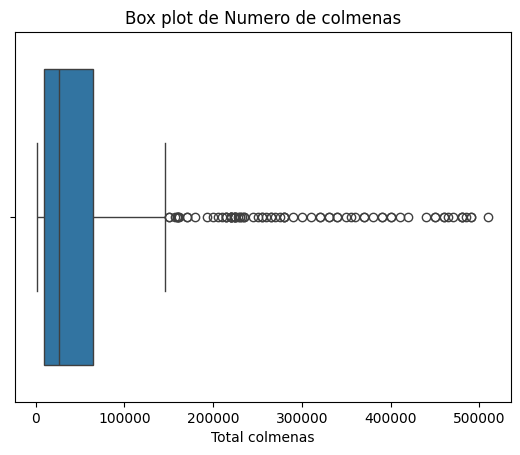

In [ ]:
# Create a box plot
g = sns.boxplot(data = df, x = 'numcol')
# Add a title and change xlabel
g.set_title('Box plot de Numero de colmenas')
g.set_xlabel('Total colmenas')

En el gráfico podemos ver claramente la presencia de outliers en la columna ‘Numero de Colemnas’,  con el histograma y el grafico po9demos observar  con exactitud la ubicación de estos valores atípicos.
Debido a que los datos de esta varaiable no presentan una distribucion normal, sus datos estan distribuidos hacia la izquierda aplicareos el metodo Z Score modificado. El Z Score nos  indica cuántas desviaciones absolutas medianas, o MADs, se encuentra un punto de datos respecto a la mediana de la distribución.
Utilizaremos un umbral de 3.5 para considerar que un punto de datos es un outlier.

In [ ]:
# Import the median_abs_deviation function
from scipy.stats import median_abs_deviation

# Obtain the MAD value
mad_score = median_abs_deviation(df['numcol'])
mad_score

19000.0

In [ ]:
# Importar estimador MAD
!pip install pyod
from pyod.models.mad import MAD

# Thershold 3.5
mad = MAD(threshold = 3.5)

# Convierte la colunma numcol en 2D numpy array
total_reshaped = df['numcol'].values.reshape(-1, 1)

#Etiqueta valores normales y outlier
labels = mad.fit(total_reshaped).labels_
labels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=ff0b7ef8ef867b9ed47cbd89d709ee39aaded79030b077e3d760a254a8ecba85
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Obtain number of outliers
print(f'Number of outliers: {labels.sum()}')

Number of outliers: 106


Se puede observar que en este la variable numcol presenta 106 outiers.

In [ ]:
Q1 = df. quantile(0.25)
Q3 = df. quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

<ipython-input-59-a89da88d1a9a>:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-59-a89da88d1a9a>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
print(type(df))
print(type(lower_limit))
print(type(upper_limit))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
print(lower_limit.head())
print(upper_limit.head())

numcol          -75000.000
yieldpercol          7.000
totalprod     -4969000.000
stocks        -1772500.000
priceperlb          -0.435
dtype: float64
numcol          149000.000
yieldpercol        111.000
totalprod      9535000.000
stocks         3271500.000
priceperlb           3.525
dtype: float64


In [ ]:
outliers = (df < lower_limit) & (df > upper_limit)

<ipython-input-63-91fa0bf51294>:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [ ]:
outliers = (df < lower_limit) & (df > upper_limit)

<ipython-input-64-91fa0bf51294>:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [ ]:
# Calculate the percentiles
seventy_fifth = df['numcol'].quantile(0.75)
twenty_fifth = df['numcol'].quantile(0.25)

# Obtain IQR
iqr = seventy_fifth - twenty_fifth

# Upper and lower thresholds
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subset the dataset
outliers = df[(df['numcol'] < lower) | (df['numcol'] > upper)]
outliers.head()


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
5,Florida,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
28,North Dakota,230000.0,128,29440000.0,8832000.0,0.63,18547000.0,1998
33,South Dakota,225000.0,95,21375000.0,10901000.0,0.64,13680000.0,1998
46,California,465000.0,60,27900000.0,9486000.0,0.55,15345000.0,1999


In [ ]:
# Obtain number of outliers
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 81


Vamos a tratar los outliers , solo para entender como tratarlos en caso de que los outliers correspondan a un error.

In [ ]:
# Calculate the median
median_value = df['numcol'].median()

# Impute outliers with the median
df_imputed = df.copy()
df_imputed.loc[outliers.index, 'numcol'] = median_value

In [ ]:
from scipy.stats.mstats import winsorize

df_winsorized = df.copy()
df_winsorized['numcol'] = winsorize(df_winsorized['numcol'],\
  limits = [0.05, 0.05], inplace = True)

Text(0.5, 0, 'Total paid per trip')

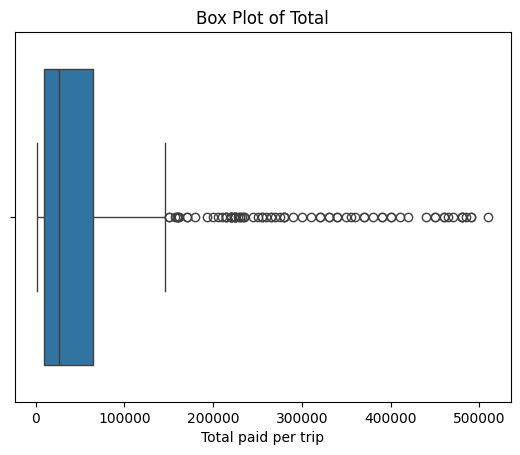

In [ ]:
# Create a box plot
g = sns.boxplot(data = df, x = 'numcol')

# Add a title and change xlabel
g.set_title('Box Plot de colmenas')
g.set_xlabel('Total de Colmenas')

Text(0.5, 0, 'Total paid per trip')

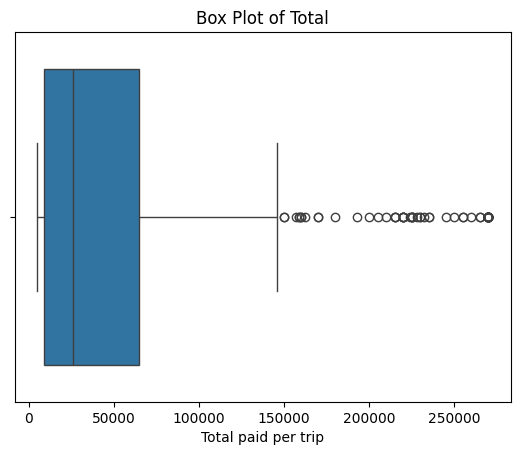

In [ ]:
# Create a box plot
g = sns.boxplot(data = df_winsorized, x = 'numcol')

# Add a title and change xlabel
g.set_title('Box Plot de Colmenas')
g.set_xlabel('Total Colmenascomcmultivarfia temultivariant')

Text(0.5, 0, 'Total paid per trip')

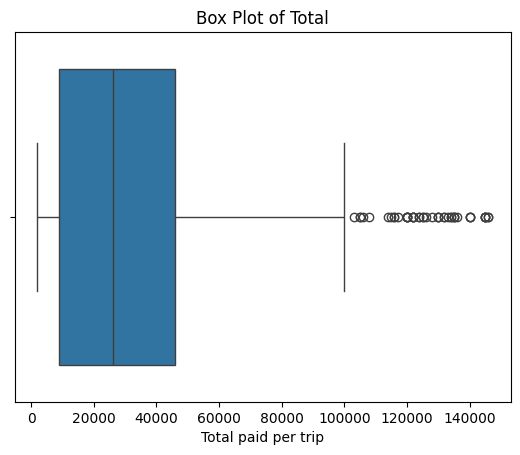

In [ ]:
# Create a box plot
g = sns.boxplot(data = df_imputed, x = 'numcol')

# Add a title and change xlabel
g.set_title('Box Plot of Total')
g.set_xlabel('Total paid per trip')

In [ ]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,785.000000,785.000000,7.850000e+02,7.850000e+02,785.000000,7.850000e+02
mean,61686.624204,60.578344,4.140957e+06,1.257629e+06,1.695159,5.489739e+06
std,92748.940458,19.427831,6.884594e+06,2.211794e+06,0.930623,9.425394e+06
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05
25%,9000.000000,46.000000,4.700000e+05,1.190000e+05,1.050000,9.010000e+05
50%,26000.000000,58.000000,1.500000e+06,3.910000e+05,1.480000,2.112000e+06
75%,65000.000000,72.000000,4.096000e+06,1.380000e+06,2.040000,5.559000e+06
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,7.090000,8.385900e+07


Observaciones:

El número de colonias(numcol) en cada estado se extienden sobre una gama enorme. Oscila entre 2000 y 510000.
La media de numcol está cerca del percentil 75% de los datos, lo que indica un sesgo a la derecha.
Como era de esperar, la desviación estándar de numcol es muy alta.
yieldpercol - El rendimiento por colonia también presenta una gran dispersión, desde 19 libras hasta 136 libras.
De hecho, todas las variables parecen tener un rango enorme, tendremos que investigar más a fondo si esta dispersión es principalmente a través de diferentes estados o varía en el mismo estado en los últimos años.



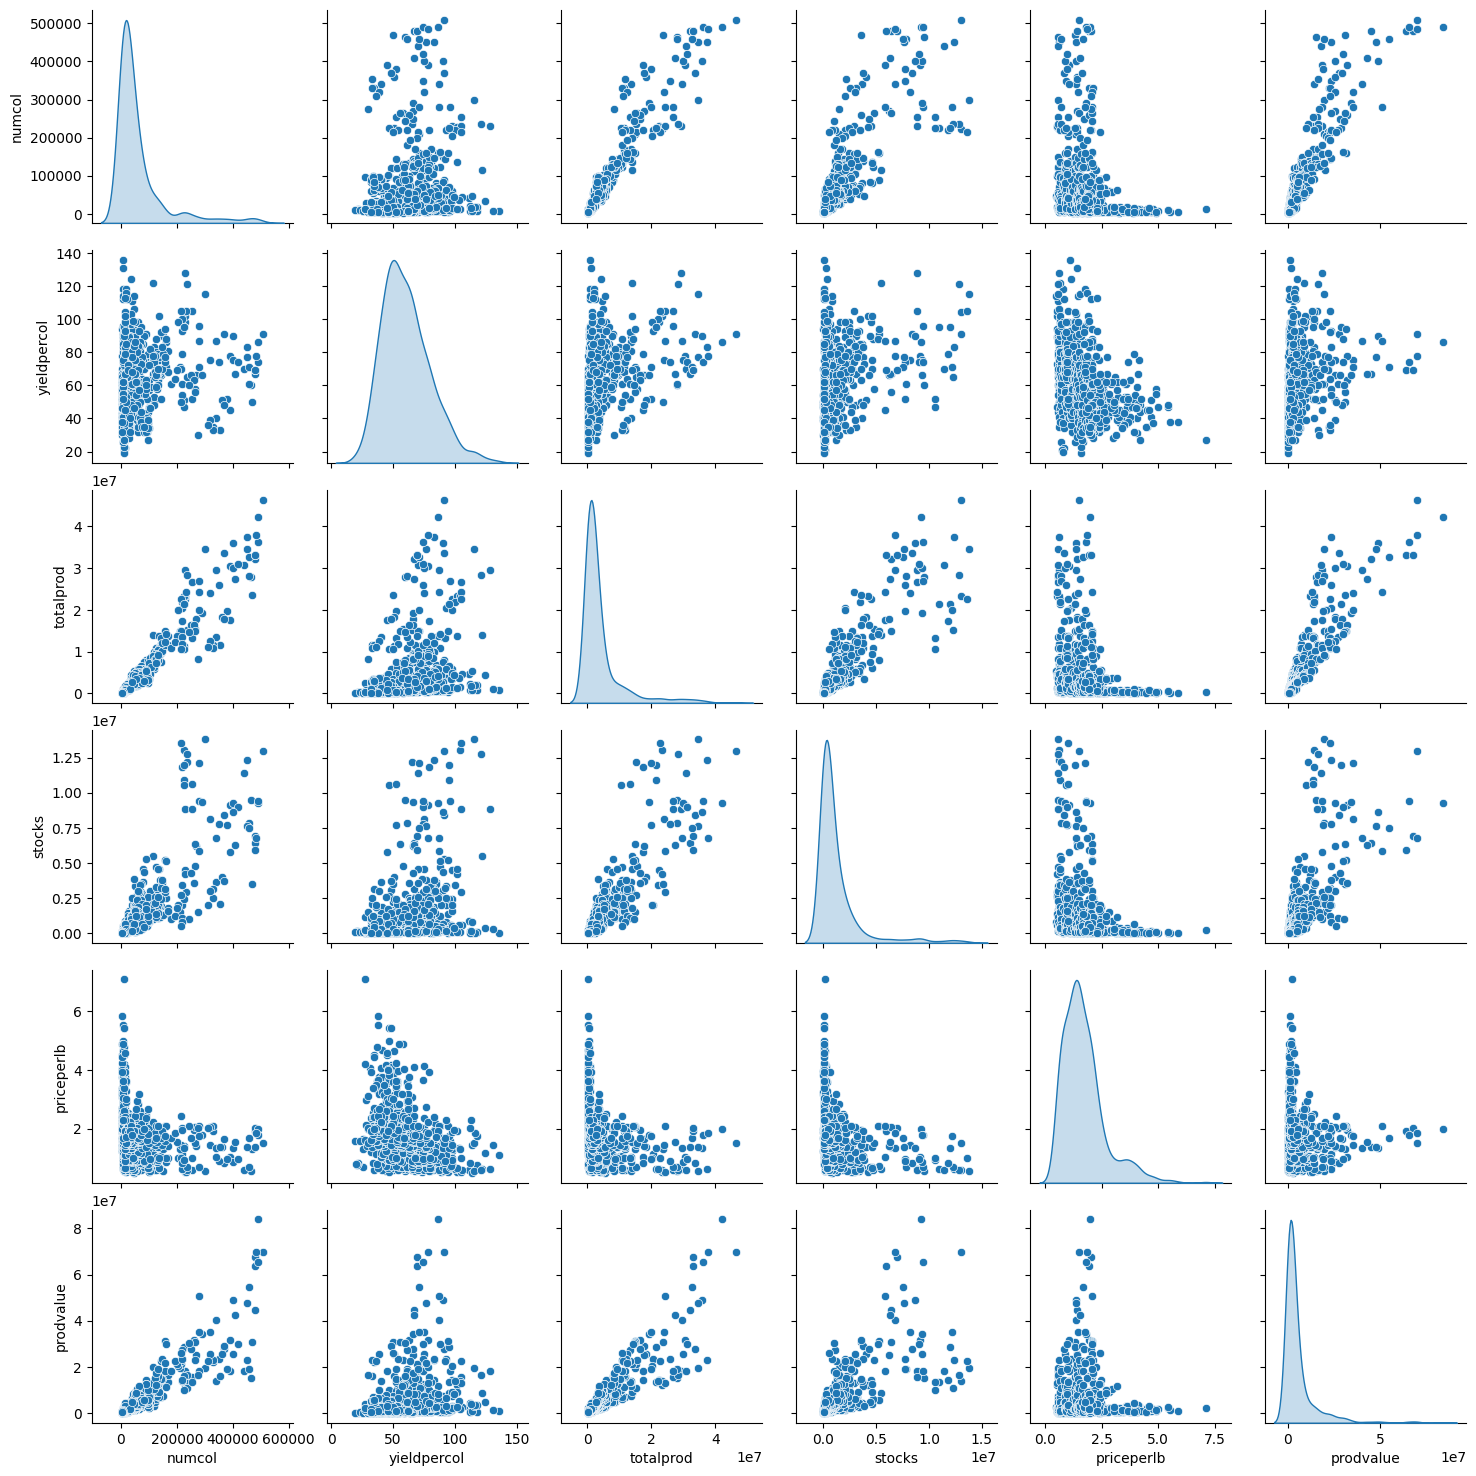

In [ ]:
sns.pairplot(df, diag_kind="kde") ## Miraremos la relacion  numerica entre variables  usando pair plots y correlacion plots

In [ ]:
correlation = df.corr() # creating a 2-D Matrix with correlation plots
correlation

<ipython-input-15-93646883673a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr() # creating a 2-D Matrix with correlation plots


,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.224539,0.951822,0.820076,-0.211427,0.898989
yieldpercol,0.224539,1.000000,0.382945,0.358676,-0.360571,0.255789
totalprod,0.951822,0.382945,1.000000,0.876872,-0.239085,0.895242
stocks,0.820076,0.358676,0.876872,1.000000,-0.275926,0.713161
priceperlb,-0.211427,-0.360571,-0.239085,-0.275926,1.000000,-0.061833
prodvalue,0.898989,0.255789,0.895242,0.713161,-0.061833,1.000000


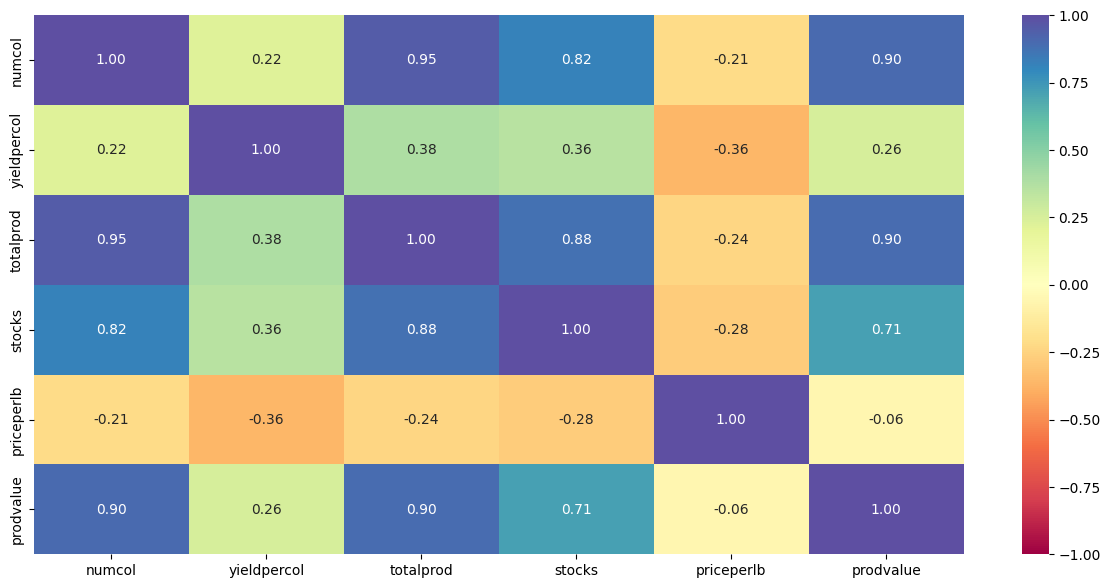

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

El número de colonias(numcol)tiene una alta correlación positiva con la producción total (total production), las existencias (stocks) y el valor de la producción(value of production). Como era de esperar, todos estos valores están muy correlacionados entre sí.
El rendimiento por colonia(Yield per colony) no tiene una alta correlación con ninguna de las características que tenemos en nuestro conjunto de datos.
Lo mismo ocurre con el precioperlb(priceperlb).
La determinación de los factores que influyen en el rendimiento por colonia(per colony yield) y en el precio por libra(price per pound ) de miel requeriría una investigación más profunda.

In [ ]:
print(df.state.nunique())## Exploramos el numero de estados(44) y  de años evaluados (1998 a 2016)
print(df.year.nunique())

44
19


<ipython-input-18-d44143fe1c68>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None)


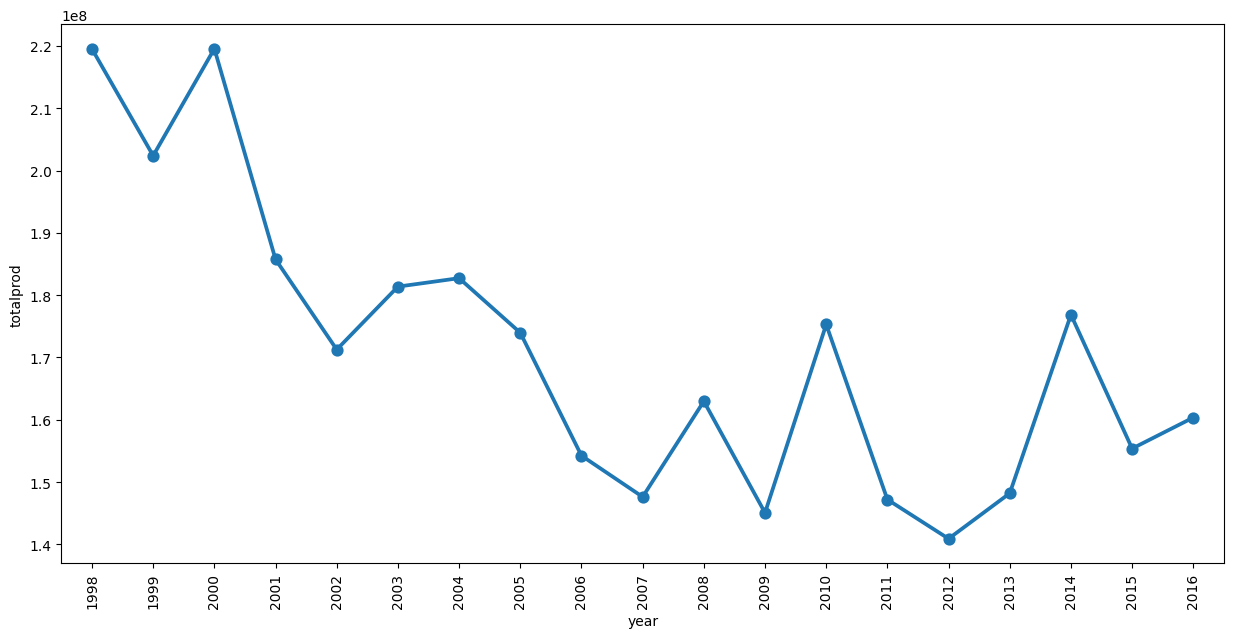

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # para girar los labls en X
plt.show()

Observaciones:

La producción total de miel en EE.UU. ha ido disminuyendo a lo largo de los años.
Producción total de miel(totalprod)= número de colonias (numcol) * rendimiento medio por colonia. Comprobemos si la producción de miel está disminuyendo debido a uno de estos factores o a ambos.

Variacion en el numero de Colonias por year.

<ipython-input-19-5972af8969e0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='numcol', data=df, ci=None, estimator=sum)


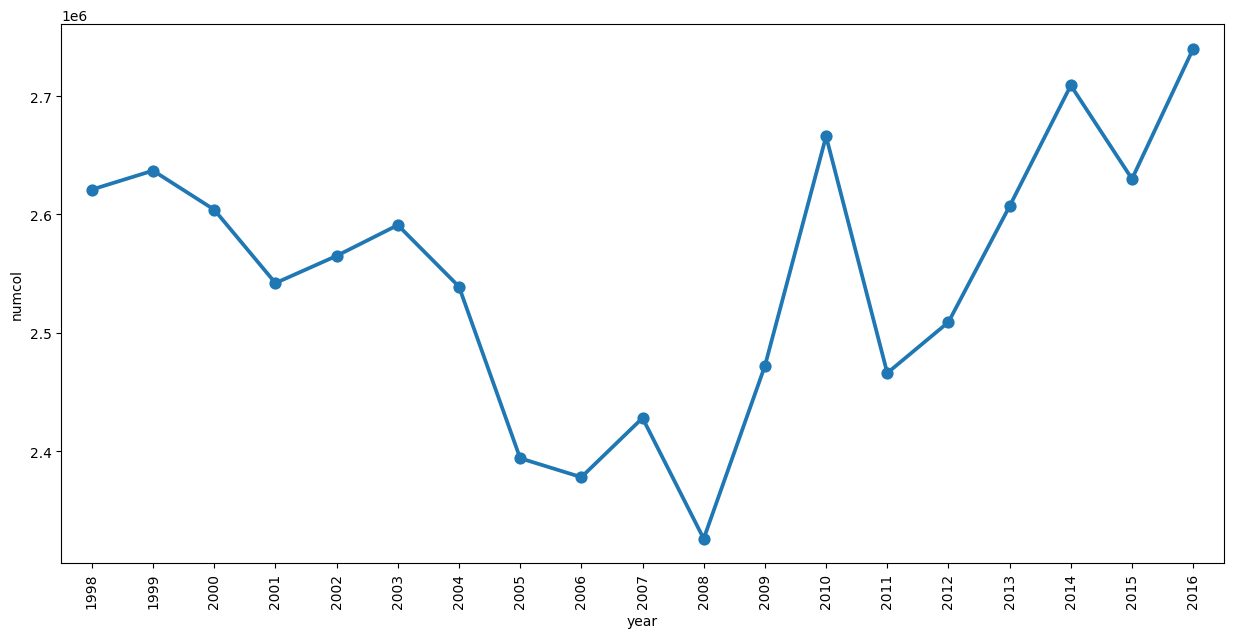

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='numcol', data=df, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observaciones:

El número(number) de colonias en todo el país muestra una tendencia a la baja entre 1998 y 2008, pero ha experimentado un repunte desde 2008.
Es posible que en 2008 se produjera alguna intervención que contribuyera a aumentar el número de colonias de abejas melíferas en todo el país.

Variacion del rendimiento por colonia(yieldpercol) a  lo largo de los year

<ipython-input-20-3b285210a47b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='yieldpercol', data=df, estimator=sum, ci=None)


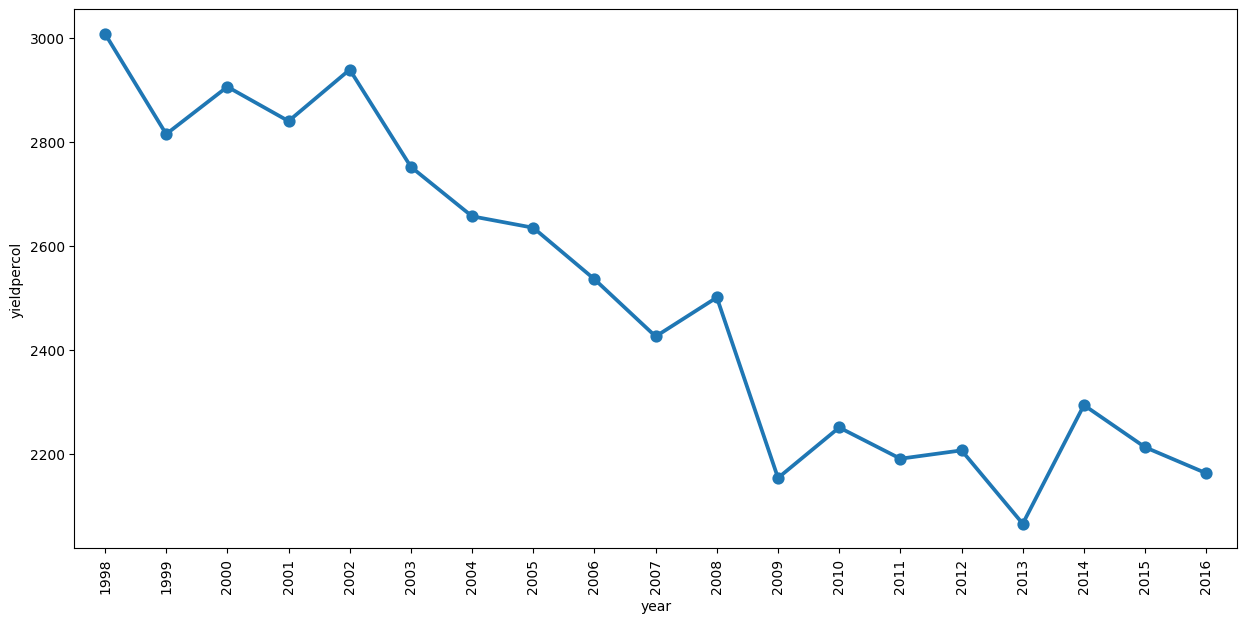

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='yieldpercol', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observación:

A diferencia del número de colonias, el rendimiento por colonia disminuye desde 1998.
Esto indica que no es el número de colonias lo que está provocando un descenso de la producción total de miel, sino el rendimiento por colonia.

Revisaremos la produccion por estado.

<ipython-input-21-64f4183ea2c9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None, hue = 'state')


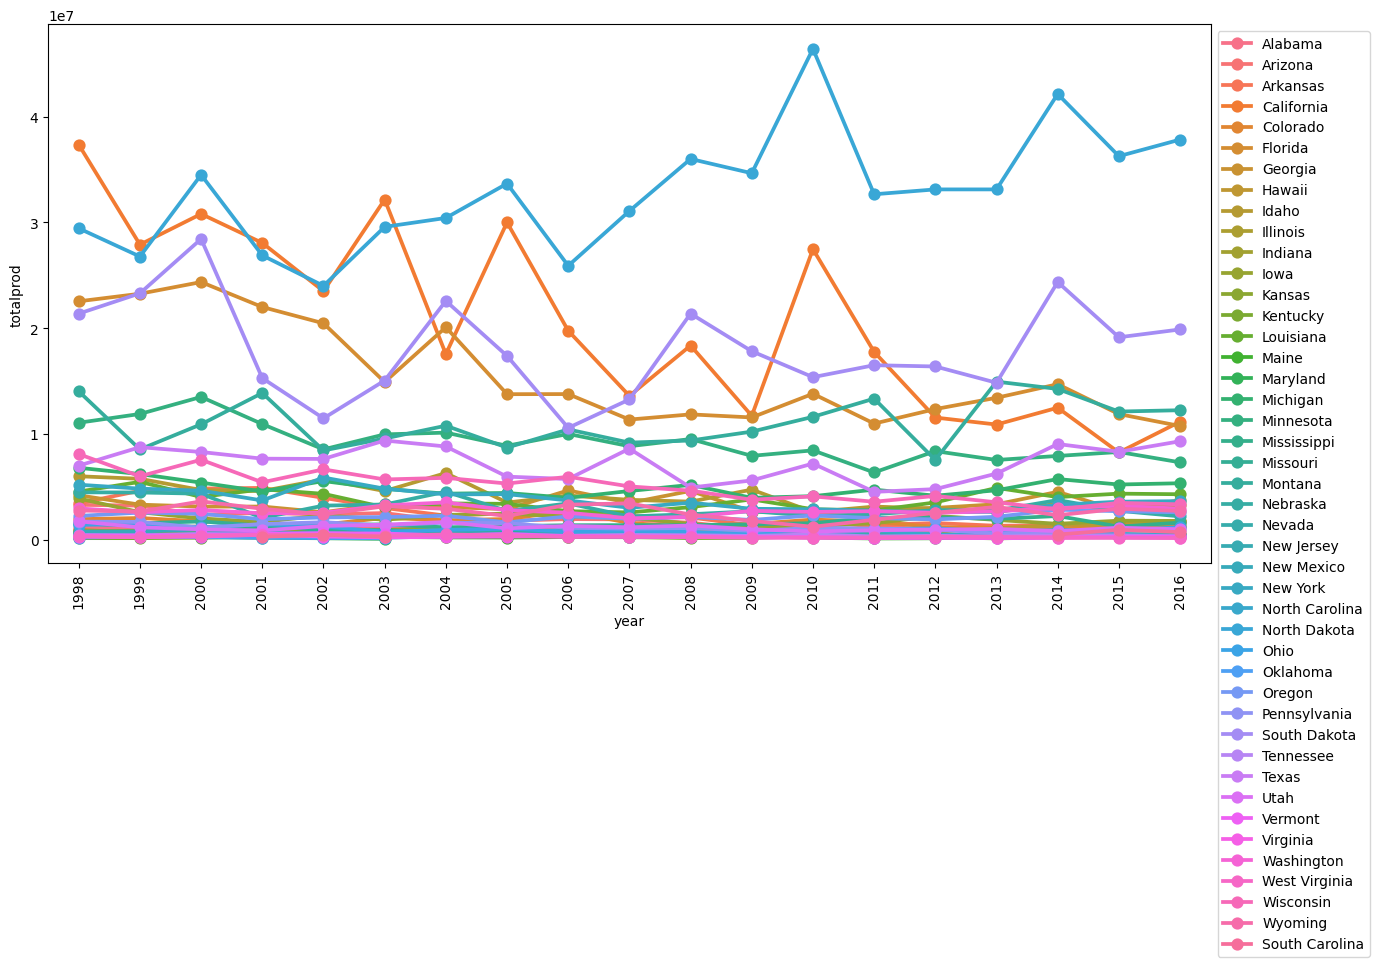

In [ ]:
plt.figure(figsize=(15, 7)) # Cambiar el tamano de grafico
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # Rotar las x en los ejes.
plt.show()

Observaciones: Algunos estados que tienen producciones mucho más altas que los demás, pero este gráfico es un poco difícil de leer. Intentemos representar cada estado por separado para entenderlo mejor.

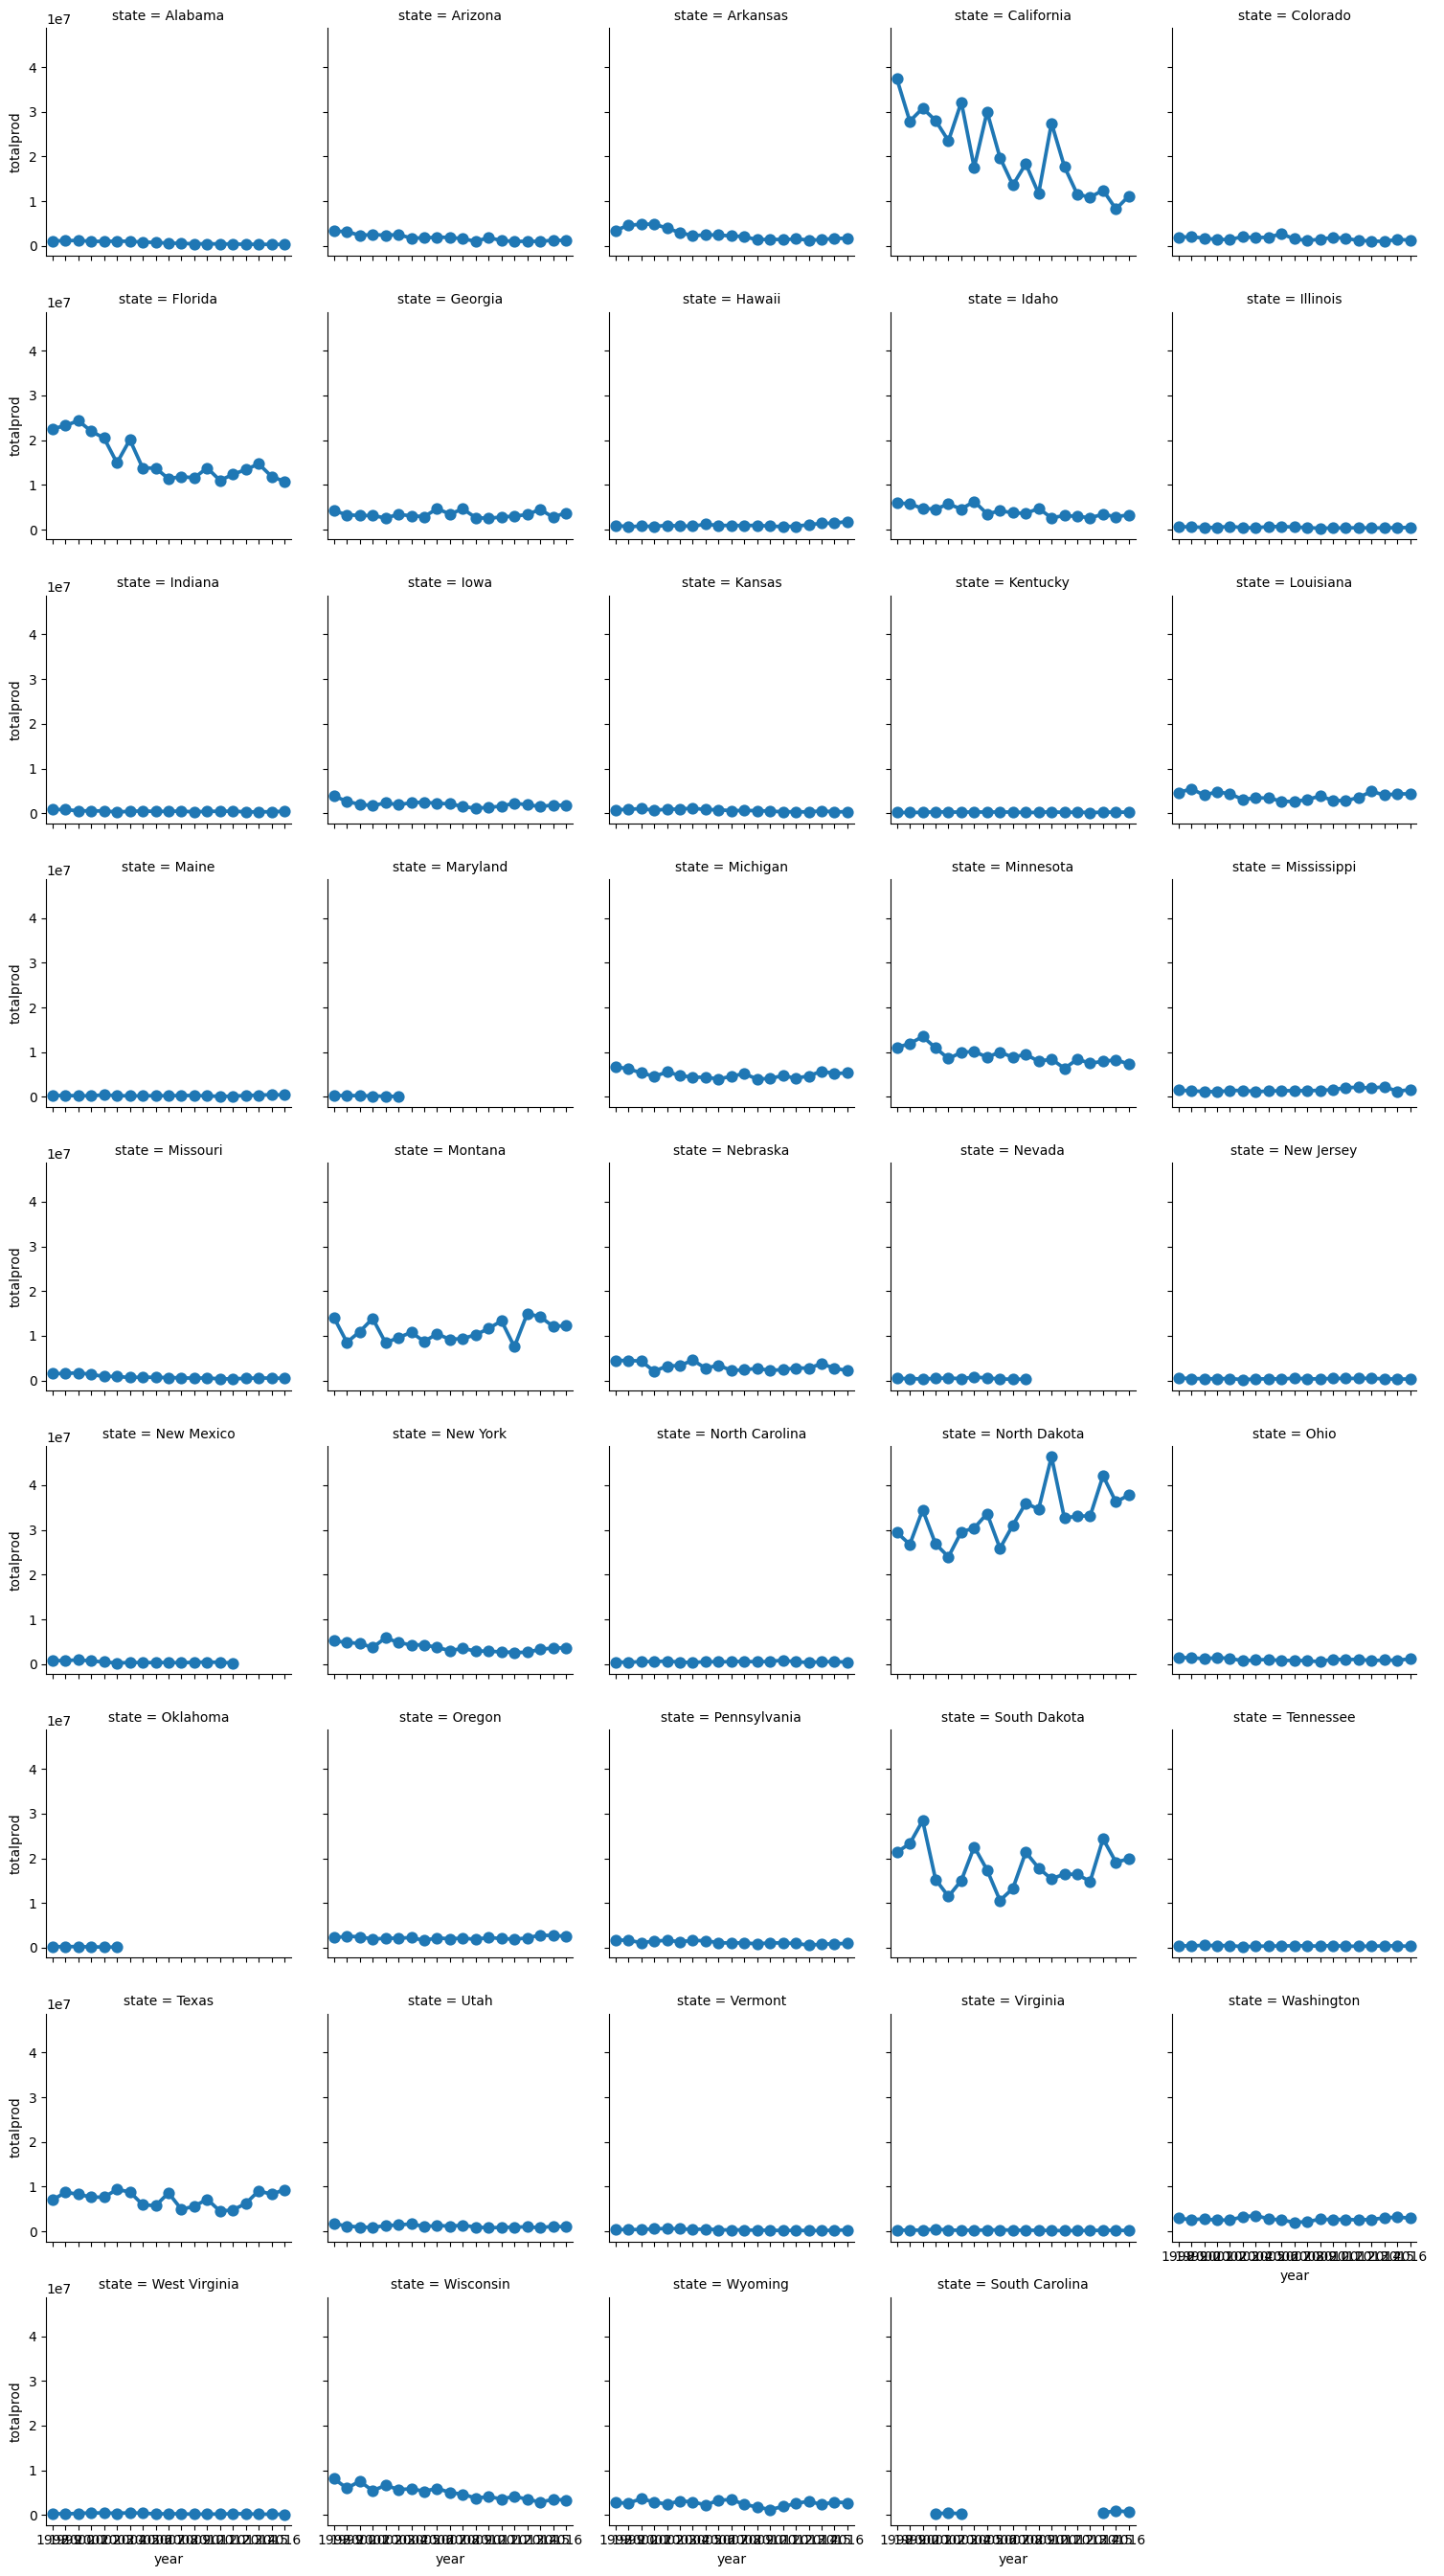

In [ ]:
sns.catplot(x='year', y='totalprod', data=df,
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
plt.show()

Observaciones:

Los principales estados productores de miel de EE.UU. son California, Florida, Dakota del Norte, Dakota del Sur y Montana.
Desgraciadamente, la producción de miel en California ha experimentado un fuerte descenso a lo largo de los años.
La producción total de Florida también ha disminuido.
Dakota del Sur ha mantenido más o menos sus niveles de producción.
Dakota del Norte ha experimentado un impresionante aumento de la producción de miel.

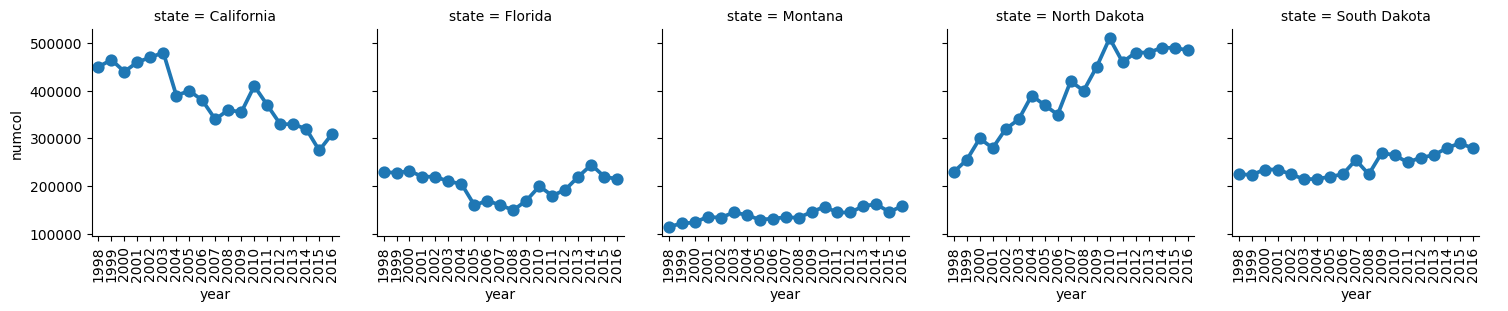

In [ ]:
## Con este codigo graficaremos los estados que mas producen. Numero de colonias
cplot1=sns.catplot(x='year', y='numcol',
            data=df[df["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
cplot1.set_xticklabels(rotation=90)
plt.show()

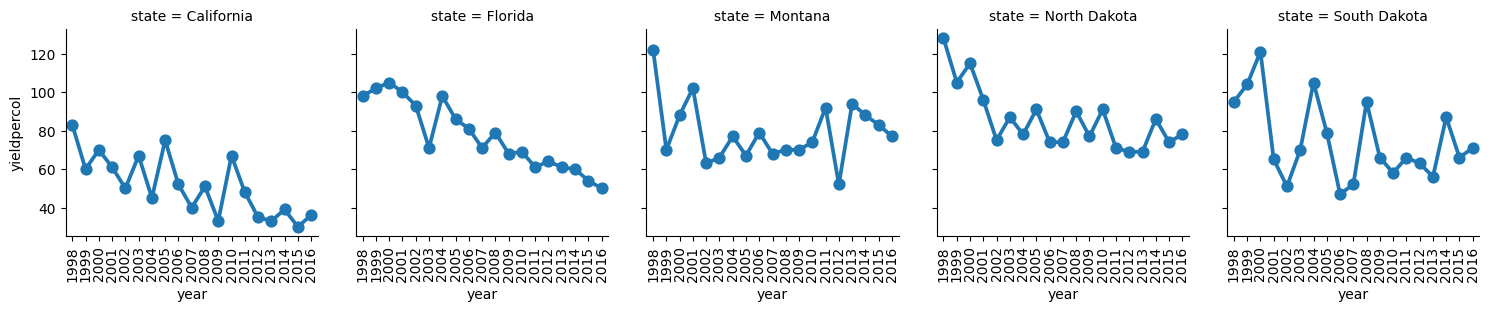

In [ ]:
cplot2=sns.catplot(x='year', y='yieldpercol',
            data=df[df["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
cplot2.set_xticklabels(rotation=90)
plt.show()

En Dakota del Norte, el número de colonias ha aumentado significativamente a lo largo de los años en comparación con los otros 4 estados.
Si comprobamos el rendimiento por colonia, se observa una tendencia general a la baja en los 5 estados a lo largo de los años.

Veamos qué efecto ha tenido la tendencia a la baja de la producción en el valor de la producción

<ipython-input-25-86d82f8aaa01>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x="year", y="prodvalue", data=df, ci=None)


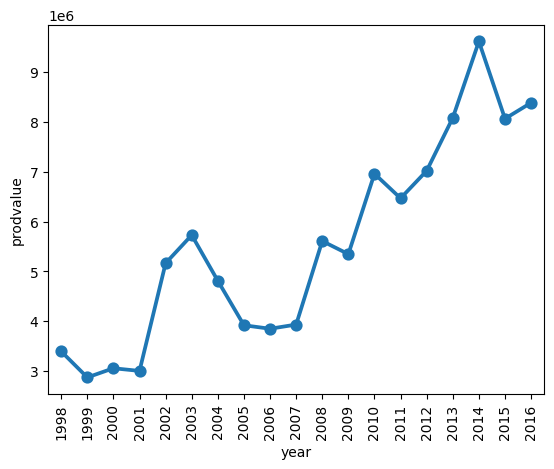

In [ ]:
sns.pointplot(x="year", y="prodvalue", data=df, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observaciones:

Se trata de una tendencia interesante. A medida que la producción total ha disminuido a lo largo de los años, el valor de la producción por libra ha aumentado con el tiempo.
Al disminuir la oferta, la demanda ha aumentado el valor de la miel.

Comprobemos cuáles son los Estados que han aprovechado esta tendencia. Podemos comparar la producción total con las existencias de los productores

<ipython-input-27-9566326af652>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="totalprod", y="state", data=df.sort_values("totalprod", ascending=False),
<ipython-input-27-9566326af652>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="stocks", y="state", data=df.sort_values("totalprod", ascending=False),


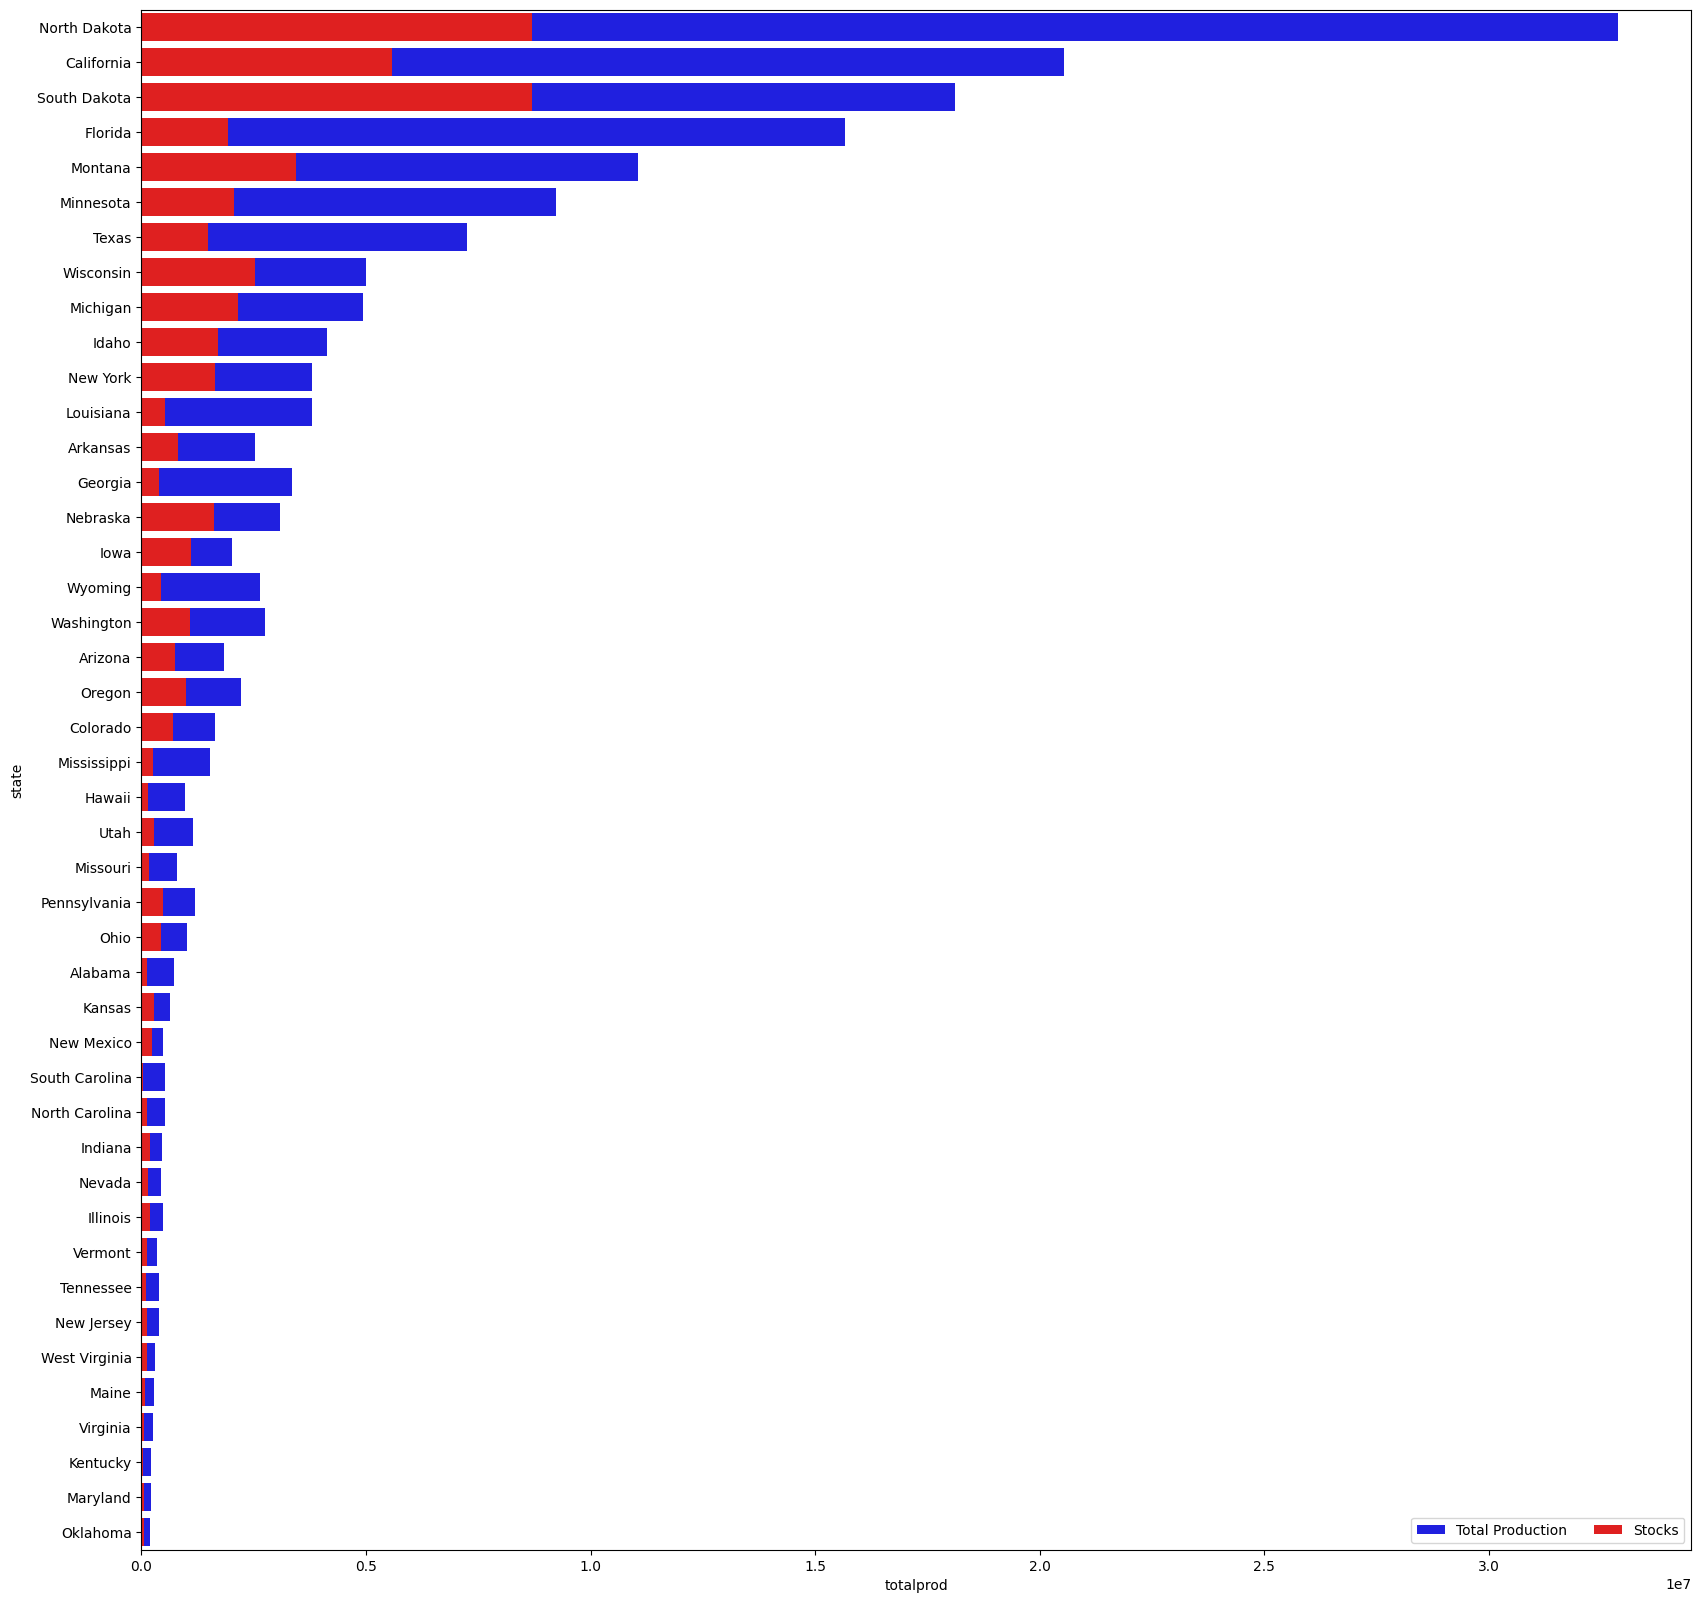

In [ ]:
plt.figure(figsize = (20,20)) # Tamano del plot

# Produccion total por estado
sns.barplot(x="totalprod", y="state", data=df.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", ci=None)

# Plot existencia por estado
sns.barplot(x="stocks", y="state", data=df.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)

#  leyenda
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

Observaciones:

1.Dakota del Norte ha conseguido vender más miel que Dakota del Sur a pesar de tener el mayor valor de producción.
2.Florida tiene la mayor eficiencia entre los principales estados productores de miel
3.Michigan es más eficiente que Wisconsin en la venta de miel.

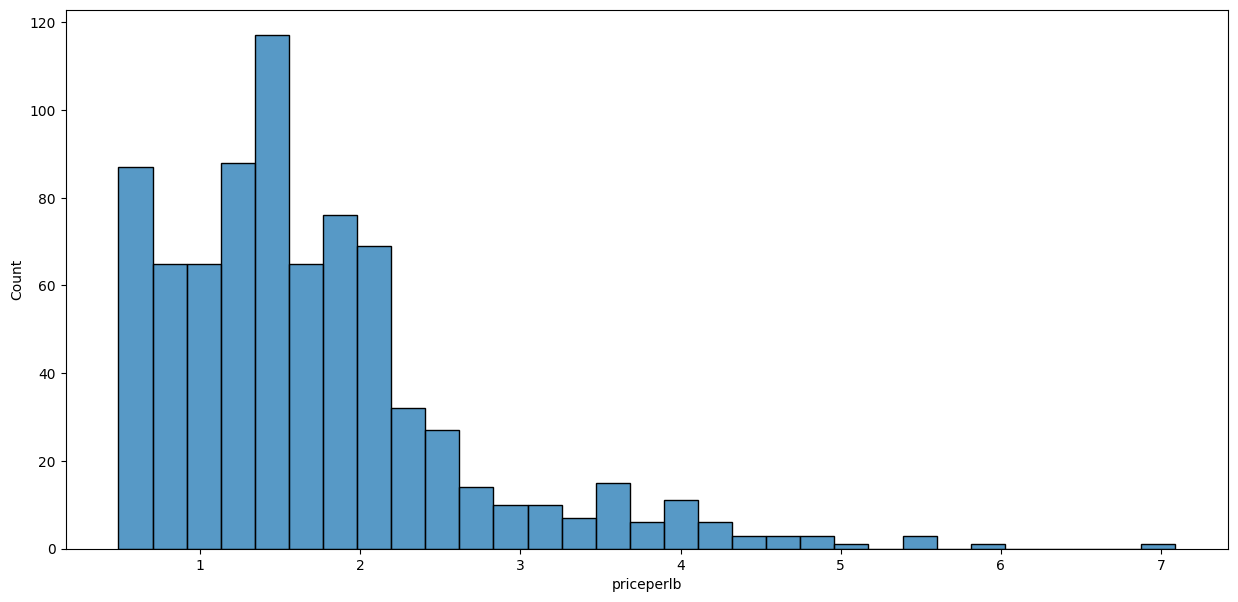

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(df.priceperlb)
plt.show()

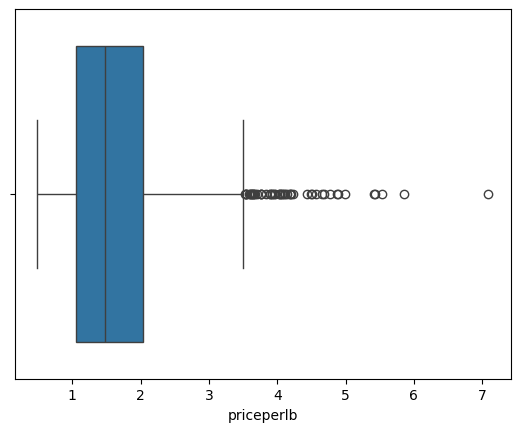

In [ ]:
sns.boxplot(data = df, x = 'priceperlb')
plt.show()

Observaciones:

El precio por libra de miel tiene una distribución sesgada a la derecha, con muchos valores atípicos hacia el extremo superior.
La mediana del precio por libra de miel es de 1,5 euros.

Veamos el precio medio por libra de miel en los distintos estados

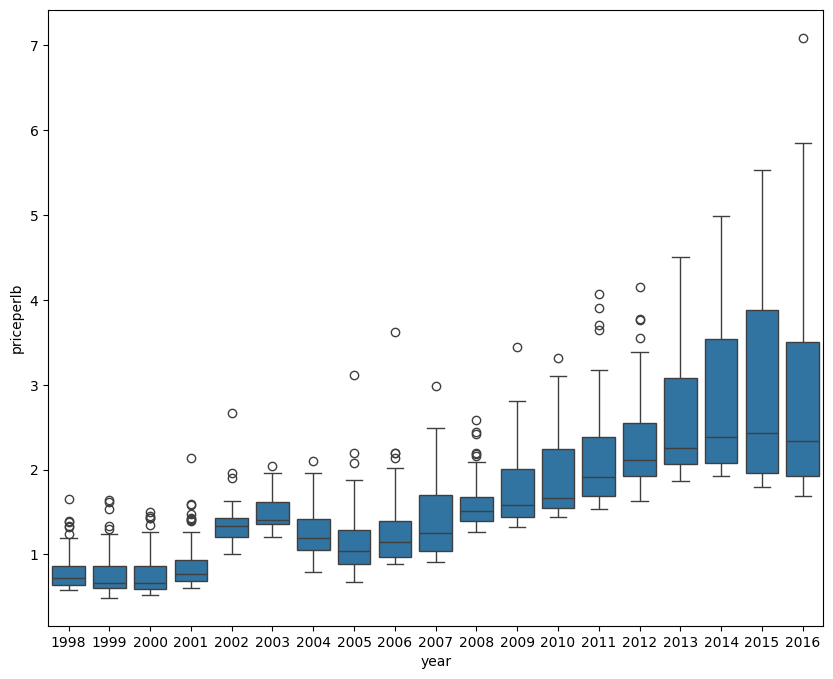

In [ ]:
fig, a1 = plt.subplots(1,figsize=(10,8))
sns.boxplot(data = df, x = 'year', y = 'priceperlb')
plt.show()

<ipython-input-31-bd2cd69c7cfd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = "state", y = "priceperlb", ci=None, color = "coral",


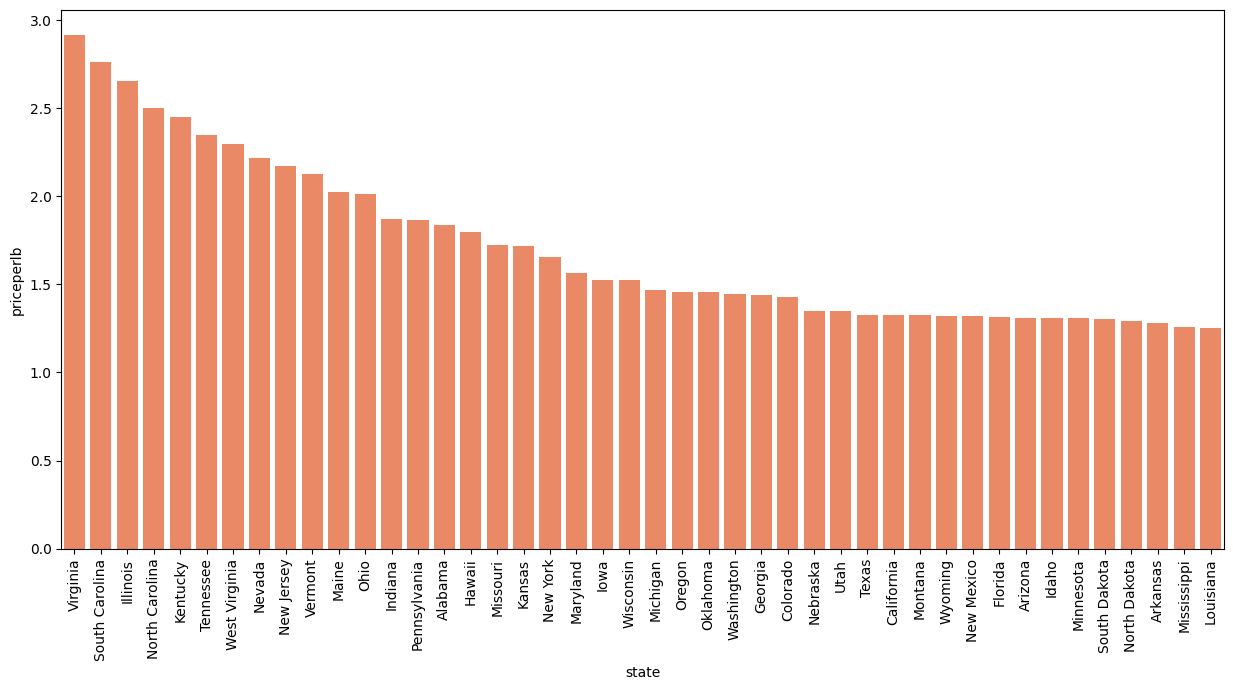

In [ ]:
plt.figure(figsize=(15, 7)) # Tamaño del grafico
sns.barplot(data = df, x = "state", y = "priceperlb", ci=None, color = "coral",
            order=df.groupby('state').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90) # Rotar los lables en X
plt.show()

Observaciones:

Virginia tiene el precio (priceperlib) más alto por libra de miel.
El precio medio por libra de miel en los principales estados productores se sitúa en el extremo inferior.
Conclusión
Podemos concluir que la producción total de miel ha disminuido a lo largo de los años, mientras que el valor de la producción por libra ha aumentado.
La razón del descenso de la producción de miel es la disminución del rendimiento por colonia a lo largo de los años.
Los principales estados productores de miel son California, Florida, Dakota del Norte, Dakota del Sur y Montana.
Entre ellos, Florida ha sido muy eficiente en la venta de miel.

**Analisis de Outliers en los datos analizados para esto importaremos la linreria sklearn , tambien calcularemos el Z-Score , es un estadistico que mide cuantas desviaciones estandar se encuentran un punto de datos con respecto ala media.ueva sección**

In [ ]:
import sklearn

In [ ]:
from scipy import stats

z = stats.zscore(df["priceperlb"])
z_abs = np.abs(z)
z_abs

0      1.048524
1      1.134543
2      1.188304
3      1.156047
4      1.070029
         ...   
780    4.467424
781    0.317023
782    2.392223
783    1.048182
784    0.091224
Name: priceperlb, Length: 785, dtype: float64

In [ ]:
print(np.where(z_abs > 3))

(array([660, 680, 699, 700, 714, 720, 729, 740, 754, 767, 769, 774, 776,
       780]),)


In [ ]:
Q1 = np.percentile(df["priceperlb"], 25, interpolation="midpoint")
Q3 = np.percentile(df["priceperlb"], 75, interpolation="midpoint")
IQR = Q3 - Q1
IQR

0.99

In [ ]:
upper_bound = df["priceperlb"] >= (Q3 + 1.5 * IQR)
lower_bound = df["priceperlb"] <= (Q1 - 1.5 * IQR)

In [ ]:
print(np.where(upper_bound))
print(np.where(lower_bound))

(array([365, 553, 555, 568, 581, 593, 595, 611, 621, 635, 648, 650, 656,
       659, 660, 662, 665, 674, 678, 680, 684, 691, 694, 696, 699, 700,
       702, 705, 714, 718, 720, 724, 727, 729, 731, 733, 734, 736, 739,
       740, 742, 754, 758, 767, 769, 771, 774, 776, 779, 780, 782]),)
(array([], dtype=int64),)


In [ ]:
print(df.shape)


(734, 8)


### **MACHING LEARNING**

 Scikit-learn, o sklearn, se utiliza específicamente para el Aprendizaje Automático. Dentro del módulo linear_model, hay una función LinearRegression() que  utilizaremos.
 Relizaremos la prediccion de acuerdo a nuestrtos datos sobre cual ser la producion de miel en el año 2050.

In [ ]:
from sklearn import linear_model

In [ ]:
#Produccion de miel por año(year)

prod_per_year = df.groupby("year").totalprod.mean().reset_index()

X = prod_per_year["year"].values.reshape(-1,1)

X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]])

In [ ]:
y = prod_per_year["totalprod"].values.reshape(-1,1)

y

array([[5105093.02325581],
       [4706674.41860465],
       [5106000.        ],
       [4221545.45454545],
       [3892386.36363636],
       [4122090.90909091],
       [4456804.87804878],
       [4243146.34146341],
       [3761902.43902439],
       [3600512.19512195],
       [3974926.82926829],
       [3626700.        ],
       [4382350.        ],
       [3680025.        ],
       [3522675.        ],
       [3800102.56410256],
       [4421650.        ],
       [3884400.        ],
       [4008925.        ]])

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_, regr.intercept_)

[[-50215.55838977]] [1.04915147e+08]


Text(0, 0.5, 'total production')

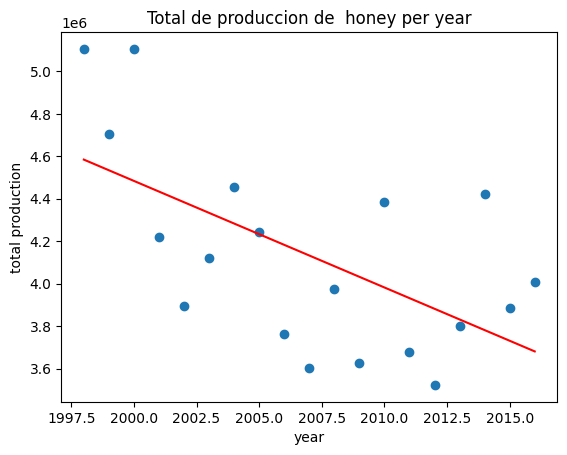

In [ ]:
ax = plt.subplot(111)
ax.scatter(X, y)
y_predict = regr.predict(X)
plt.plot(X, y_predict, 'red')
plt.title("Total de produccion de  honey per year")
plt.xlabel("year")
plt.ylabel("total production")

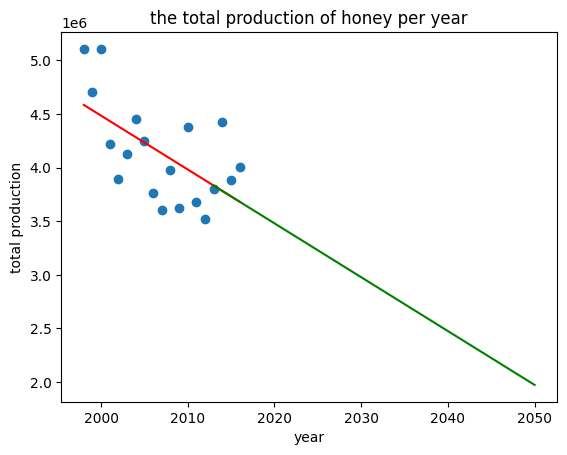

In [ ]:
#Let’s predict what the year 2050 may look like in terms of honey production.

X_future = np.array(range(2013, 2051)).reshape(-1,1)
future_predict = regr.predict(X_future)
ax2 = plt.subplot(111)
ax2.scatter(X, y)
y_predict = regr.predict(X)
plt.plot(X, y_predict, 'red')
plt.title("the total production of honey per year")
plt.xlabel("year")
plt.ylabel("total production")
plt.plot(X_future, future_predict, 'green')
plt.show()